In [ ]:
%tensorflow_version 2.x

In [ ]:
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.2.0-rc2


## 퍼셉트론 구현
* 앞서 배운 텐서와 연산자를 이용하여 퍼셉트론 구현
* 고수준 모델 API(케라스)를 사용하지 않고 구현

In [ ]:
# 파라미터 값(input 특성 개수, 퍼셉트론의 개수, 학습률) 설정
input_dim = 2
hidden_units = 1

In [ ]:
# 가중치(input 특성 : 2/ 퍼셉트론 : 1)
w = tf.Variable(tf.random.uniform(shape=(input_dim, hidden_units)))

# 편향(퍼셉트론 : 1)
b = tf.Variable(tf.zeros(shape=()))

In [ ]:
w

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[0.35090756],
       [0.43556702]], dtype=float32)>

In [ ]:
b

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>

In [ ]:
# 퍼셉트론의 수학 모델 f(x*w + b)
def predict(input):
  x = tf.matmul(input, w) + b
  x = tf.maximum(0, x)
  return x

In [ ]:
# loss(mse)
def mse_loss(labels, predictions):
  loss = tf.reduce_mean(tf.square(labels - predictions))
  return loss

In [ ]:
# train
def train(inputs, labels):
  with tf.GradientTape() as tape:
    # 퍼셉트론 모델을 예측값을 계산
    predictions = predict(inputs)
    # 모델의 예측값과 정답간의 에러를 loss 을 이용해 계산
    loss = mse_loss(labels, predictions)
    # 모델의 변수(w, b) loss 값에 미치는 영향도를 미분(오차역전파)을 통해 계산
    gradient_lw, gradient_lb = tape.gradient(loss, [w, b])
  # 경사하강법을 수행해서 모델의 변수(w, b) 업데이트
  w.assign(w - learning_rate * gradient_lw)
  b.assign(b - learning_rate * gradient_lb)
  return loss

  * 퍼셉트론 모델 학습을 위한 AND Gate 데이터 생성

In [ ]:
# x_1 = 0
# x_2 = 0
# y = 0
# x_1 = 1
# x_2 = 0
# y = 0
# x_1 = 0
# x_2 = 1
# y = 0
# x_1 = 1
# x_2 = 1
# y = 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
inputs = np.array([[0, 0],
                   [0, 1],
                   [1, 0],
                   [1, 1]], dtype=np.float32)

In [ ]:
lables = np.array([0, 0, 0, 1], dtype=np.float32)

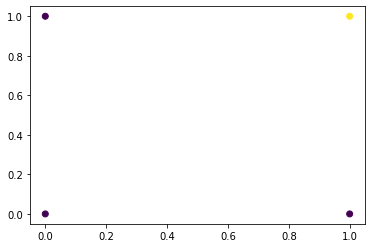

In [ ]:
plt.scatter(inputs[:, 0], inputs[:, 1], c=labels[:])

  * train 함수를 반복적으로 실행하여 퍼셉트론 모델을 학습

In [ ]:
for epoch in range(100):
  for x, y in zip(inputs, labels):
    loss = train([x], [y])
  print("Epoch {}: loss={}".format(epoch+1, float(loss)))

Epoch 1: loss=0.10784226655960083
Epoch 2: loss=0.10711144655942917
Epoch 3: loss=0.10638288408517838
Epoch 4: loss=0.10565699636936188
Epoch 5: loss=0.10493402183055878
Epoch 6: loss=0.10421418398618698
Epoch 7: loss=0.10349766165018082
Epoch 8: loss=0.10278461128473282
Epoch 9: loss=0.10207527875900269
Epoch 10: loss=0.10136961936950684
Epoch 11: loss=0.10066791623830795
Epoch 12: loss=0.09997016191482544
Epoch 13: loss=0.09927645325660706
Epoch 14: loss=0.09858687222003937
Epoch 15: loss=0.09790153056383133
Epoch 16: loss=0.09722035378217697
Epoch 17: loss=0.09654337912797928
Epoch 18: loss=0.09587076306343079
Epoch 19: loss=0.09520243853330612
Epoch 20: loss=0.0945383682847023
Epoch 21: loss=0.09387873113155365
Epoch 22: loss=0.09322337806224823
Epoch 23: loss=0.09257234632968903
Epoch 24: loss=0.09192565083503723
Epoch 25: loss=0.09128328412771225
Epoch 26: loss=0.09064524620771408
Epoch 27: loss=0.09001148492097855
Epoch 28: loss=0.08938205242156982
Epoch 29: loss=0.0887569561600

In [ ]:
predictions = predict(inputs)

In [ ]:
predictions

<tf.Tensor: shape=(4, 1), dtype=float32, numpy=
array([[0.        ],
       [0.16564938],
       [0.16544524],
       [0.78182006]], dtype=float32)>

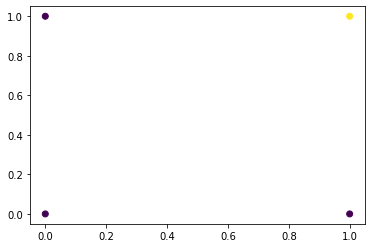

In [ ]:
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:]> 0.5)

* 학습된 퍼셉트론 모델의 테스트를 위한 데이터 생성

In [ ]:
test_inputs = np.random.uniform(0, 1, (5000, 2)).astype(np.float32)

In [ ]:
test_inputs

array([[0.7508148 , 0.07932366],
       [0.04838471, 0.862919  ],
       [0.4168101 , 0.5379348 ],
       ...,
       [0.20343839, 0.64504933],
       [0.5593674 , 0.92286193],
       [0.5541719 , 0.5872658 ]], dtype=float32)

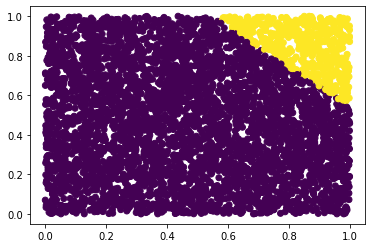

In [ ]:
predictions = predict(test_inputs)
plt.scatter(test_inputs[:, 0], test_inputs[:, 1], c=predictions[:]> 0.5)

In [ ]:
w

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[0.6161706 ],
       [0.61637473]], dtype=float32)>

In [ ]:
b

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([-0.45072535], dtype=float32)>